# StarDist (Detection) + Stracking (Tracker)
This example shows a combination of StarDist Detection and Stracking (Tracker)

## Load trained mode

In [1]:
from stardist.models import StarDist2D 

# prints a list of available models 
StarDist2D.from_pretrained() 

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


## StarDist: Prediction and detection

In [2]:
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from tifffile import imread
import numpy as np

folder=""
filename="P31-crop2.tif"

img= imread(folder+filename)

labels=np.zeros(img.shape);

img=normalize(img)


for i in range(img.shape[0]):
    labels[i,:,:],details = model.predict_instances(img[i,:,:])
    pointstemp= details['points']
    X0 = i*np.ones((pointstemp.shape[0],1))
    pointstemp = np.hstack((X0,pointstemp))
    if i>0:        
        points=np.concatenate((points,pointstemp),axis=0)
    else:
        points=pointstemp
                  

## Create an empty napari viewer

In [3]:
%gui qt

In [4]:
import napari
from napari.utils import nbscreenshot
viewer = napari.Viewer(axis_labels='tyx')

## Display Input and StarDist Prediction

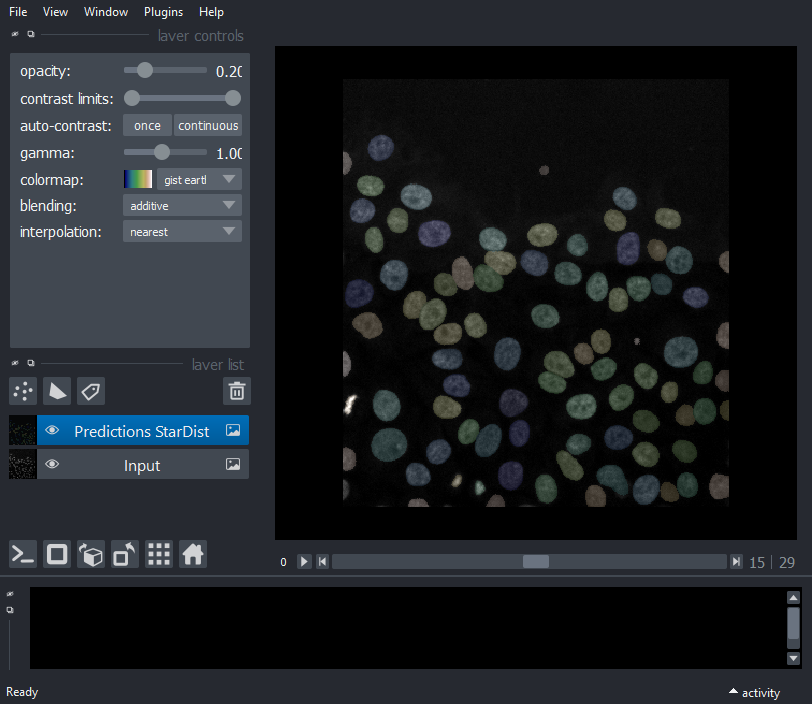

In [5]:
viewer.add_image(img, name='Input', multiscale=False,
                 contrast_limits=[0, 3], colormap='gray',blending='additive');

viewer.add_image(labels, name='Predictions StarDist', multiscale=False,
                 colormap='gist_earth',blending='additive',opacity=0.2);

nbscreenshot(viewer)

## Display spots from StarDist

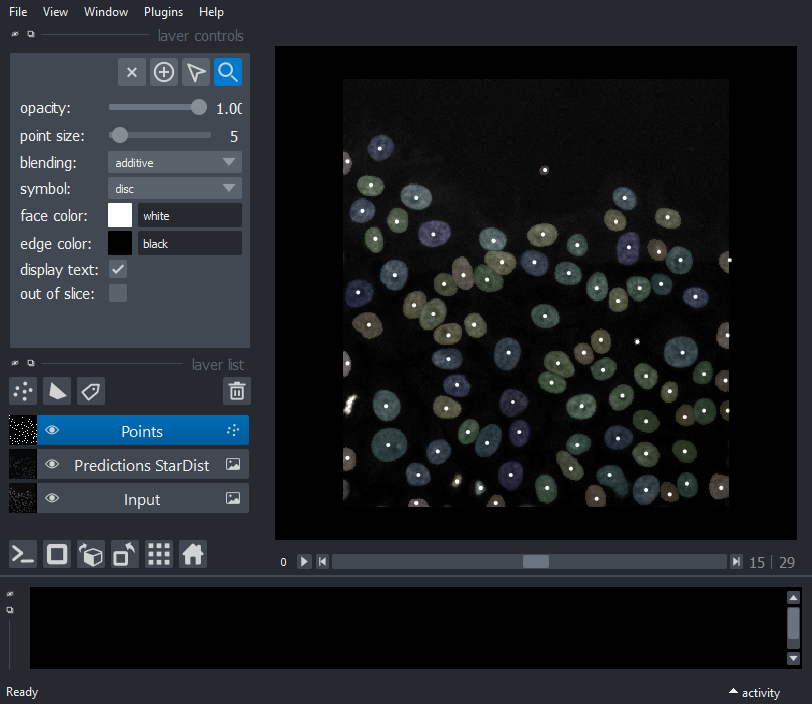

In [6]:
from stracking.containers import SParticles

particles = SParticles(data=points)
viewer.add_points(particles.data, size=5, blending='additive')
nbscreenshot(viewer)

## Linker
Shortest path tracking with euclidean cost

In [ ]:
from stracking.linkers import SPLinker, EuclideanCost

euclidean_cost = EuclideanCost(max_cost=100);
my_tracker = SPLinker(cost=euclidean_cost, gap=1);
tracks = my_tracker.run(particles);


## Display tracks

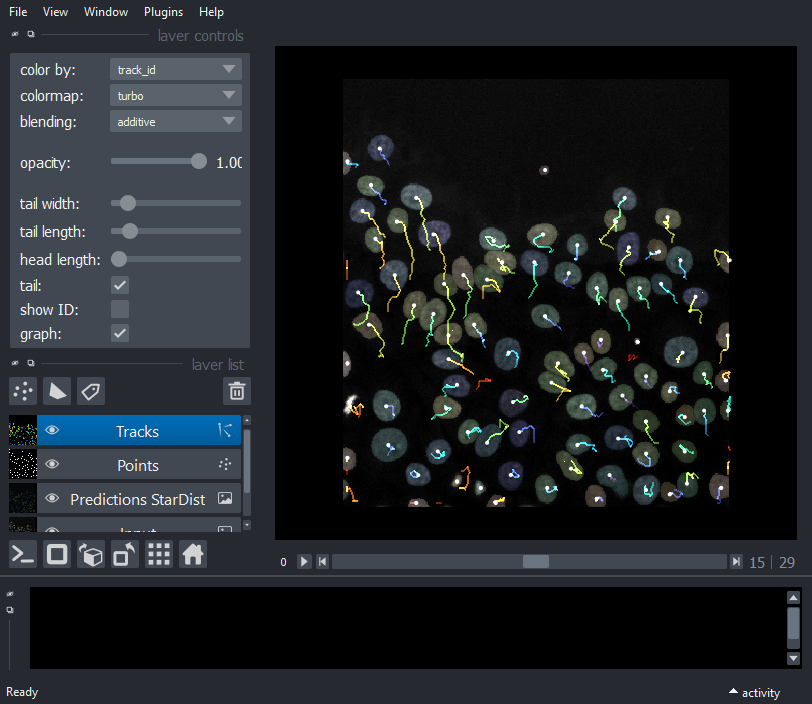

In [8]:
viewer.add_tracks(tracks.data, name='Tracks')
nbscreenshot(viewer)